## Context Matters: A Theory of Semantic Discriminability for Perceptual Encoding Systems
### Laurent Lessard & Kushin Mukherjee

In [4]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import linear_sum_assignment
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
import math
import seaborn as sns
import warnings
import os
from scipy import stats
import seaborn as sns

warnings.filterwarnings('ignore')





In [5]:
"""
Input is a m x n array of (concepts) x (colors) filled with association ratings
Output is a list of length m with the index of the color that should be associated with each concept
"""
def assignment_solve( ratings, method="balanced" ):
    m,n = ratings.shape
    assert m <= n, "More concepts than colors, assignment impossible!"
    
    # isolated merit function (only considers target in isolation)
    if method == "isolated":
        merit_matrix = ratings
    
    # balanced merit function (balances ratings of target vs off-target objects with each color)
    elif method == "balanced":
        t = 1  # this is the penalty parameter. t=1 for balanced, t=0 recovers isolated case.
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = ratings[i,j] - t*ratings[np.arange(m)!=i,j].max()
    
    # baseline merit function (uniformly bad assignment)
    elif method == "baseline":
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = -abs( ratings[i,j] - ratings[np.arange(m)!=i,j].max() )
                
    else:
        assert False, "unknown method in assignment problem"
        
    row_ind, col_ind = linear_sum_assignment( merit_matrix, maximize=True )
    return col_ind


In [6]:
p1 = ['corn','carrot','grape','banana']
p2 =['sleeping','driving','peach','cherry']
p3 = ['working','leisure','safety','comfort']
p4 = ['eggplant','celery','efficiency','speed']
p5= ['working','leisure','grape','banana']
p6 = ['eggplant','celery','peach','cherry']
p7 = ['corn','carrot','safety','comfort']
p8 = ['sleeping','driving','efficiency','speed']


p9 = ['corn','carrot','peach','cherry']
p10 = ['sleeping','driving','grape','banana']
p11 = ['working','leisure','efficiency','speed']
p12 = ['eggplant','celery','safety','comfort']
p13 = ['working','leisure','peach','cherry']
p14 = ['eggplant','celery','grape','banana']
p15 = ['corn','carrot','efficiency','speed',]
p16 = ['sleeping','driving','safety','comfort']
plist=[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16]
#plist = [ x for item in plist for x in item]

true_assignments =[
    {"banana": "#d0b85a", "carrot": "#cc4f1b", "corn": "#ffffff", "grape": "#512d5f"},
{"cherry": "#ea1d1d", "driving": "#3efe44", "peach": "#f1a78a", "sleeping": "#512d5f"},
{"comfort": "#a06776", "working": "#000000", "safety": "#55824d", "leisure": "#e81a4b"},
{"celery": "#608218", "efficiency": "#5e78a1", "eggplant": "#600b84", "speed": "#e81a4b"},
{"banana": "#fcdb42", "grape": "#600b84", "leisure": "#a0bae6", "working": "#3b3b3b"},
{"celery": "#73cf10", "cherry": "#ea1d1d", "eggplant": "#600b84", "peach": "#f7a75a"},
{"carrot": "#cc4f1b", "comfort": "#a06776", "corn": "#fcdb42", "safety": "#55824d"},
{"driving": "#184415", "efficiency": "#7ec6ba", "sleeping": "#512d5f", "speed": "#e81a4b"},

{"carrot": "#cc4f1b", "cherry": "#ea1d1d", "corn": "#d5b811", "peach": "#f1a78a"},
{"banana": "#d0b85a", "driving": "#ea1d1d", "grape": "#b62ef2", "sleeping": "#1c3d61"},
{"efficiency": "#ffffff", "leisure": "#90689f", "speed": "#e81a4b", "working": "#3b3b3b"},
{"celery": "#0e8a19", "comfort": "#a06776", "eggplant": "#600b84", "safety": "#d0e942"},
{"cherry": "#ea1d1d", "leisure": "#d5a9e4", "peach": "#f1a78a", "working": "#3b3b3b"},
{"banana": "#fcdb42", "celery": "#8cf47e", "eggplant": "#000000", "grape": "#5e2b3a"},
{"carrot": "#ac6619", "corn": "#d0b85a", "efficiency": "#5e78a1", "speed": "#e81a4b"},
{"comfort": "#a06776", "driving": "#ea1d1d", "safety": "#d0e942", "sleeping": "#000000"}
]
 

In [7]:
##running model from scratch
plist_ = plist + ['apple', 'reliability' , 'mushroom' , 'eating']
plist_ = ['corn','carrot','eggplant','celery','mushroom',
    'grape','banana','peach','cherry','apple', 
    'sleeping','driving','working','leisure','eating',
    'efficiency','speed','safety','comfort','reliability']

In [8]:
from itertools import combinations, permutations
con_combs = (list(combinations(plist_,4)))

In [9]:
con_combs

[('corn', 'carrot', 'eggplant', 'celery'),
 ('corn', 'carrot', 'eggplant', 'mushroom'),
 ('corn', 'carrot', 'eggplant', 'grape'),
 ('corn', 'carrot', 'eggplant', 'banana'),
 ('corn', 'carrot', 'eggplant', 'peach'),
 ('corn', 'carrot', 'eggplant', 'cherry'),
 ('corn', 'carrot', 'eggplant', 'apple'),
 ('corn', 'carrot', 'eggplant', 'sleeping'),
 ('corn', 'carrot', 'eggplant', 'driving'),
 ('corn', 'carrot', 'eggplant', 'working'),
 ('corn', 'carrot', 'eggplant', 'leisure'),
 ('corn', 'carrot', 'eggplant', 'eating'),
 ('corn', 'carrot', 'eggplant', 'efficiency'),
 ('corn', 'carrot', 'eggplant', 'speed'),
 ('corn', 'carrot', 'eggplant', 'safety'),
 ('corn', 'carrot', 'eggplant', 'comfort'),
 ('corn', 'carrot', 'eggplant', 'reliability'),
 ('corn', 'carrot', 'celery', 'mushroom'),
 ('corn', 'carrot', 'celery', 'grape'),
 ('corn', 'carrot', 'celery', 'banana'),
 ('corn', 'carrot', 'celery', 'peach'),
 ('corn', 'carrot', 'celery', 'cherry'),
 ('corn', 'carrot', 'celery', 'apple'),
 ('corn', '

twice the largest one minus 1
keep tally on the proportion
double the number of sims till we're happy


for fixed confidnece margin of error n = 4 how many samples do we need, do variance of proportion depend on the proportion

.01



In [11]:
rat_mat = pd.read_csv('data/uw71_ratings_mat_no_norm.csv')

In [12]:
rat_mat = rat_mat.rename(columns = {"Unnamed: 0":"concepts"})

In [14]:
from tqdm import tqdm
sem_cons = []
assignments = []
for i,this_comb in tqdm(enumerate(con_combs)):
    sub_mat = rat_mat[rat_mat.concepts.isin(this_comb)].iloc[:, 1:]
    max_colors = assignment_solve(np.array(sub_mat))
    assignment_options = (np.array(list(permutations(max_colors,4))))
    assignment_options_dict = dict.fromkeys([str(x) for x in assignment_options],0)
    gt_mat = sub_mat.iloc[:, max_colors] 

    for j in range(0,1000):
        pert_mat = np.random.normal(gt_mat, 1.4*gt_mat*(1-gt_mat), gt_mat.shape)
        pert_assign = assignment_solve(pert_mat)
        assignment_options_dict[str(max_colors[pert_assign])] +=1
        #print(str(max_colors[pert_assign]))
    sem_cons.append(max(assignment_options_dict.values())/1000)
    assignments.append(max(assignment_options_dict, key=assignment_options_dict.get))




   

4845it [16:41,  4.84it/s]


In [15]:
min(sem_cons)

0.091

In [16]:
pairwise_SCs = pd.concat([pd.DataFrame(np.array(con_combs),columns ={'c1','c2','c3','c4'}), pd.DataFrame( sem_cons, columns = {'semantic_contrast'})],axis=1)

In [18]:
pairwise_SCs

,c4,c3,c1,c2,semantic_contrast
0,corn,carrot,eggplant,celery,0.985
1,corn,carrot,eggplant,mushroom,0.965
2,corn,carrot,eggplant,grape,0.784
3,corn,carrot,eggplant,banana,0.575
4,corn,carrot,eggplant,peach,0.955
...,...,...,...,...,...
4840,efficiency,speed,safety,comfort,0.169
4841,efficiency,speed,safety,reliability,0.144
4842,efficiency,speed,comfort,reliability,0.171
4843,efficiency,safety,comfort,reliability,0.100


In [17]:
pairwise_SCs.to_csv('pairwise_SCs.csv')

In [847]:
sorted(pairwise_SCs[['c1','c2','c3','c4']].iloc[3,:].values)==['banana','carrot','corn','e']

False

In [855]:
exp2semcons = []
for p in plist:
    for i in range(pairwise_SCs.shape[0]):
        if sorted(p)==sorted(pairwise_SCs[['c1','c2','c3','c4']].iloc[i,:].values):
            exp2semcons.append(pairwise_SCs[['semantic_contrast']].iloc[i,:].values[0])

NameError: name 'pairwise_SCs' is not defined

In [856]:
exp2semcons

[0.68,
 0.927,
 0.387,
 0.865,
 0.928,
 0.999,
 0.62,
 0.573,
 0.972,
 0.902,
 0.59,
 0.632,
 0.883,
 0.702,
 0.834,
 0.588]

In [857]:
plist

[['corn', 'carrot', 'grape', 'banana'],
 ['sleeping', 'driving', 'peach', 'cherry'],
 ['working', 'leisure', 'safety', 'comfort'],
 ['eggplant', 'celery', 'efficiency', 'speed'],
 ['working', 'leisure', 'grape', 'banana'],
 ['eggplant', 'celery', 'peach', 'cherry'],
 ['corn', 'carrot', 'safety', 'comfort'],
 ['sleeping', 'driving', 'efficiency', 'speed'],
 ['corn', 'carrot', 'peach', 'cherry'],
 ['sleeping', 'driving', 'grape', 'banana'],
 ['working', 'leisure', 'efficiency', 'speed'],
 ['eggplant', 'celery', 'safety', 'comfort'],
 ['working', 'leisure', 'peach', 'cherry'],
 ['eggplant', 'celery', 'grape', 'banana'],
 ['corn', 'carrot', 'efficiency', 'speed'],
 ['sleeping', 'driving', 'safety', 'comfort']]

In [851]:
pairwise_SCs

,c2,c1,c4,c3,semantic_contrast
0,corn,carrot,eggplant,celery,0.993
1,corn,carrot,eggplant,mushroom,0.986
2,corn,carrot,eggplant,grape,0.776
3,corn,carrot,eggplant,banana,0.623
4,corn,carrot,eggplant,peach,0.988
...,...,...,...,...,...
4840,efficiency,speed,safety,comfort,0.407
4841,efficiency,speed,safety,reliability,0.308
4842,efficiency,speed,comfort,reliability,0.476
4843,efficiency,safety,comfort,reliability,0.261


In [240]:
assignment_options = (np.array(list(permutations([0,1,2,3],4))))
assignment_options_dict = dict.fromkeys([str(x) for x in assignment_options],0)


In [216]:
#convert back to ints
import re
[int(x) for x in re.split('\[|\]',str(ans))[1].split()]

[2, 1, 0, 3]

In [254]:
#max value and key
max(assignment_options_dict.values())
max(assignment_options_dict, key=assignment_options_dict.get)

'[2 1 0 3]'

In [252]:
assignment_options_dict

{'[0 1 2 3]': 0,
 '[0 1 3 2]': 0,
 '[0 2 1 3]': 0,
 '[0 2 3 1]': 0,
 '[0 3 1 2]': 0,
 '[0 3 2 1]': 0,
 '[1 0 2 3]': 0,
 '[1 0 3 2]': 0,
 '[1 2 0 3]': 0,
 '[1 2 3 0]': 0,
 '[1 3 0 2]': 0,
 '[1 3 2 0]': 0,
 '[2 0 1 3]': 0,
 '[2 0 3 1]': 0,
 '[2 1 0 3]': 20,
 '[2 1 3 0]': 0,
 '[2 3 0 1]': 0,
 '[2 3 1 0]': 0,
 '[3 0 1 2]': 0,
 '[3 0 2 1]': 0,
 '[3 1 0 2]': 0,
 '[3 1 2 0]': 0,
 '[3 2 0 1]': 0,
 '[3 2 1 0]': 0}

In [ ]:
[[0 1 2 3]
 [0 1 3 2]
 [0 2 1 3]
 [0 2 3 1]
 [0 3 1 2]
 [0 3 2 1]
 [1 0 2 3]
 [1 0 3 2]
 [1 2 0 3]
 [1 2 3 0]
 [1 3 0 2]
 [1 3 2 0]
 [2 0 1 3]
 [2 0 3 1]
 [2 1 0 3]
 [2 1 3 0]
 [2 3 0 1]
 [2 3 1 0]
 [3 0 1 2]
 [3 0 2 1]
 [3 1 0 2]
 [3 1 2 0]
 [3 2 0 1]
 [3 2 1 0]]

array(<itertools.permutations object at 0x17f0b8a90>, dtype=object)

In [8]:
clean_df_f=pd.read_csv('data/clean_df_f.csv')

In [8]:
clean_df_f=pd.read_csv('data/clean_df_f.csv')

In [15]:
for i, row in clean_df_f.iterrows():
    if row.condition == '0':
        print(row.category)

In [17]:
pal = []

for i, row in clean_df_f.iterrows():
    if row.condition == 0:
        if row.category == '"p1"':
            pal.append(0)
        if row.category == '"p2"':
            pal.append(1)
        if row.category == '"p3"':
            pal.append(2)
        if row.category == '"p4"':
            pal.append(3)
        if row.category == '"p5"':
            pal.append(4)
        if row.category == '"p6"':
            pal.append(5)
        if row.category == '"p7"':
            pal.append(6)
        if row.category == '"p8"':
            pal.append(7)
    if row.condition == 1:
        if row.category == '"p1"':
            pal.append(8)
        if row.category == '"p2"':
            pal.append(9)
        if row.category == '"p3"':
            pal.append(10)
        if row.category == '"p4"':
            pal.append(11)
        if row.category == '"p5"':
            pal.append(12)
        if row.category == '"p6"':
            pal.append(13)
        if row.category == '"p7"':
            pal.append(14)
        if row.category == '"p8"':
            pal.append(15)


clean_df_f['pal'] = pal

In [18]:
plot_df = clean_df_f.groupby(['bar_col','con_pal_conc','subject_id','category','condition','response' ]).\
apply(lambda x: len(x)/8).reset_index(name= 'num_times_picked')
col_dict= {a:a for a in plot_df.bar_col.unique()}

plot_df_backup = plot_df
for pal in plot_df_backup.category.unique():
    dp = plot_df_backup[plot_df_backup.category == pal]
    for cond in dp.condition.unique():
        dpp = dp[dp.condition==cond]
        concepts = dpp.response.unique()
        for col in dpp.bar_col.unique():
            dppp = dpp[dpp.bar_col==col]
            #concepts = dppp.response.unique()
            for subj in dppp.subject_id.unique():
                dp_ = dppp[dppp.subject_id==subj]
                for conc in concepts:
                    if not conc in dp_.response.unique():
                        plot_df = plot_df.append(pd.DataFrame([[col,'NA',subj,pal,cond,conc,0]],columns = plot_df.columns))
                        

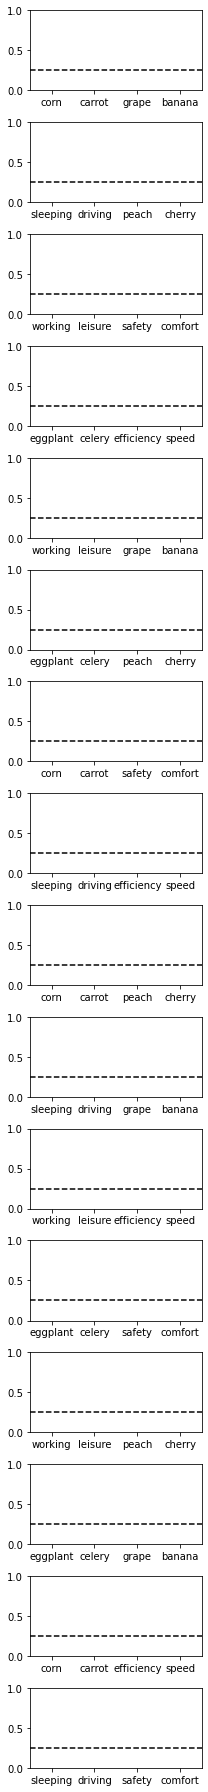

In [19]:
fig =plt.figure(figsize=(3,25))
plt.rcParams['pdf.fonttype'] = 42
sp=1
for i in range(2):
    for j in range(8):
       
    
        pdf = plot_df[(plot_df.condition == f'{i}')&(plot_df.category ==f'"p{j+1}"')]
        
        hue_ord=[]
        this_p = plist[((i*8)+j)]
        for p in this_p:
            hue_ord.append(true_assignments[((i*8)+j)][p])
        
    
        #sns.set_theme(style="white",rc = {'patch.linewidth': 0.5, 'patch.edgecolor':'black',})

        g = sns.barplot(ax = fig.add_subplot(16,1,sp),
            data=pdf,color = 'black',
            x="response", y="num_times_picked", hue="bar_col", palette =col_dict,
            ci=68, order = plist[(i*8)+j], hue_order= hue_ord
        )
        plt.axhline( y=0.25, ls='--', c='black')
        plt.xlabel('')
        ax = plt.gca()
        ax.get_legend().remove()
        plt.ylabel('')
        plt.ylim(0,1)
        plt.yticks([0,0.5,1])
        plt.tick_params(labelsize=10)
        #plt.show()

        
        sp+=1
plt.tight_layout()

#plt.savefig(f'../human_data_faceted.pdf',format='pdf')
    


In [20]:
set_acc_df = clean_df_f.groupby(['condition','category'])\
.agg('mean').filter(items=['total_accuracy']).reset_index()
model_set_acc = pd.read_csv('data/model_set_acc.csv')
model_set_acc= model_set_acc.drop(columns= ['Unnamed: 0','mciter'])

In [37]:
model_set_acc

,pal,total_acc
0,0,2.964
1,1,2.975
2,2,1.774
3,3,2.929
4,4,3.121
5,5,3.748
6,6,2.248
7,7,2.100
8,8,3.182
9,9,2.926


In [41]:
itemdf = pd.read_csv('data/item_level_df.csv')
itemdf

,Unnamed: 0,index,concept,pal,accuracy,source,pal_conc
0,0,316,banana,0,1.000,data,0banana
1,1,366,banana,0,1.000,data,0banana
2,2,385,banana,0,1.000,data,0banana
3,3,405,banana,0,1.000,data,0banana
4,4,474,banana,0,1.000,data,0banana
...,...,...,...,...,...,...,...
23099,23099,59,speed,7,0.654,model,7speed
23100,23100,60,working,10,0.611,model,10working
23101,23101,61,working,12,0.752,model,12working
23102,23102,62,working,2,0.601,model,2working


In [21]:
p_df = set_acc_df.join(model_set_acc)
#p_df.filter(['pal','total_accuracy']).to_csv('../setwise_accuracies.csv')

array([[1.        , 0.59506418],
       [0.59506418, 1.        ]])

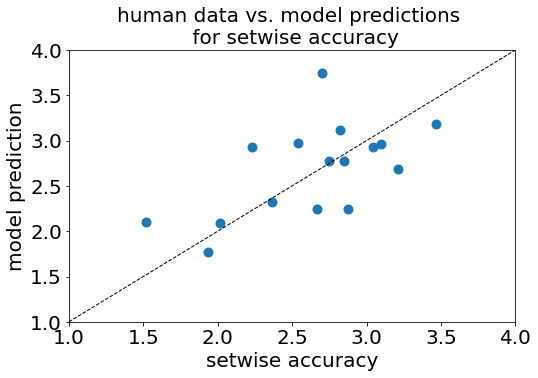

In [22]:
plt.figure(figsize=(8,5))
#sns.scatterplot(data=plot_df, x="total_accuracy", y="total_acc", marker = 'o')
plt.scatter(p_df.total_accuracy, p_df.total_acc, marker= 'o',s=80)
plt.xlim(1,4)
plt.ylim(1,4)
plt.tick_params(labelsize=20)
plt.xlabel("setwise accuracy",fontsize= 20)
plt.ylabel("model prediction",fontsize= 20)
plt.axline((1, 1), (4, 4), linewidth=1, color='k', linestyle ='--')
plt.title('human data vs. model predictions \n for setwise accuracy', fontsize= 20)
#plt.savefig('../setwise_fit.pdf', format = 'pdf')
np.corrcoef(p_df['total_accuracy'],p_df['total_acc'])

In [23]:
all_item_accs = pd.read_csv('data/all_item_acc.csv')
all_item_accs = all_item_accs.drop(columns= ['Unnamed: 0'])
all_item_accs= all_item_accs.rename(columns = {'num_times_picked':'mean_prop_picked'})

In [24]:
pred_proportions = all_item_accs.mean_prop_picked

pred_prop_0 = all_item_accs[all_item_accs.pal.isin([0,1,2,3,4,5,6,7])].mean_prop_picked
pred_prop_1 = all_item_accs[all_item_accs.pal.isin([8,9,10,11,12,13,14,15])].mean_prop_picked



In [25]:

data_proportions = plot_df.groupby(['condition','category','response','bar_col']).\
apply(lambda x: np.mean(x.num_times_picked)).\
reset_index(name ='mean_prop_picked').mean_prop_picked


array([[1.        , 0.93238698],
       [0.93238698, 1.        ]])

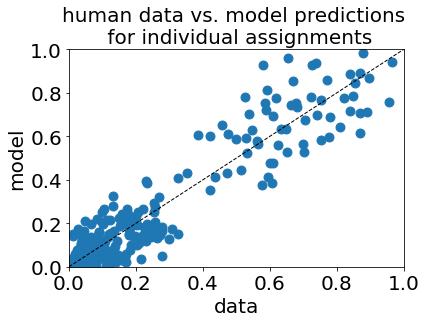

In [26]:
plt.figure(figsize=(6,4))

plt.scatter(data_proportions,pred_proportions, marker= 'o',s=80)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params(labelsize=20)
plt.xlabel("data",fontsize= 20)
plt.ylabel("model",fontsize= 20)
plt.axline((1, 1), (4, 4), linewidth=1, color='k', linestyle ='--')
plt.title('human data vs. model predictions \n for individual assignments', fontsize= 20)
plt.savefig('../overall_fit.pdf', format = 'pdf')
np.corrcoef(data_proportions,pred_proportions)


In [27]:
plt.figure(figsize=(6,4))

plt.scatter(data_prop_1,pred_prop_1, marker= 'o',s=80)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params(labelsize=20)
plt.xlabel("data",fontsize= 20)
plt.ylabel("model",fontsize= 20)
plt.axline((1, 1), (4, 4), linewidth=1, color='k', linestyle ='--')
plt.title('human data vs. model predictions \n for individual assignments', fontsize= 20)
#plt.savefig('../overall_fit.pdf', format = 'pdf')
np.corrcoef(data_prop_1,pred_prop_1)


NameError: name 'data_prop_1' is not defined

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(6,4))

plt.scatter(data_prop_0,pred_prop_0, marker= 'o',s=80)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params(labelsize=20)
plt.xlabel("data",fontsize= 20)
plt.ylabel("model",fontsize= 20)
plt.axline((1, 1), (4, 4), linewidth=1, color='k', linestyle ='--')
plt.title('human data vs. model predictions \n for individual assignments', fontsize= 20)
#plt.savefig('../overall_fit.pdf', format = 'pdf')
np.corrcoef(data_prop_0,pred_prop_0)


NameError: name 'data_prop_0' is not defined

<Figure size 432x288 with 0 Axes>

In [29]:
t = clean_df_f.filter(items=['bar_col','answer','pal','con_pal_conc','accuracy']).sort_values(['answer','pal'])
t['pal']= t['pal'].astype('string')
t['pal_conc'] = t['pal']+t['answer']

cdict_df = t.groupby(['pal_conc'])['bar_col'].agg(['max']).reset_index()
cdict = dict(zip(cdict_df['pal_conc'].values.tolist(), cdict_df['max'].values.tolist()))
#pd.DataFrame.from_dict(cdict,orient='index',columns=['hex']).rename_axis('pal_conc').reset_index().to_csv('../cdict.csv')
item_df = clean_df_f.filter(items=['answer','pal','accuracy']).sort_values(['answer','pal'])

In [30]:
item_df['source'] = 'data'
item_df['pal'] = item_df['pal'].astype('string')
item_df = item_df.rename(columns = {'answer':'concept'})
item_df['pal_conc'] = item_df['pal']+item_df['concept']
model_item_df = pd.read_csv('data/model_item_df.csv')
model_item_df = model_item_df.drop(columns = ['Unnamed: 0'])
item_df_full = pd.concat([item_df, model_item_df])

In [31]:
item_df_full.reset_index(inplace=True) ### has model and data rows vertically stacked`

In [32]:
reg_df = clean_df_f.filter(items=['subject_id','answer','repetition','bar_col','pal','accuracy']).sort_values(['answer','pal'])

reg_df['pal'] = reg_df['pal'].astype('string')
reg_df = reg_df.rename(columns = {'answer':'concept'})
reg_df['pal_conc'] = reg_df['pal']+reg_df['concept']
reg_df_avg = reg_df.merge(model_item_df,on="pal_conc")
reg_df_avg = reg_df_avg.rename(columns = {'accuracy_y':'distance'})
#reg_df_avg.to_csv('../reg_df_avg.csv')

In [35]:
quartet_TVs = pd.read_csv('data/quartet_TVs_Hs.csv').iloc[:, 1:]
all_sem_d = pd.read_csv('data/all_semdists_floor.csv').iloc[:, 1:]
all_sem_d.color1 = all_sem_d.apply(lambda x: x.color1.split('V')[1], axis=1)
all_sem_d.color2 = all_sem_d.apply(lambda x: x.color2.split('V')[1], axis=1)


In [36]:
all_sem_d

,concept1,concept2,color1,color2,semdist
0,corn,carrot,1,2,0.062131
1,corn,carrot,1,3,0.020410
2,corn,carrot,1,4,0.024888
3,corn,carrot,1,5,0.091462
4,corn,carrot,1,6,0.019116
...,...,...,...,...,...
472145,comfort,reliability,68,70,0.036482
472146,comfort,reliability,68,71,0.115093
472147,comfort,reliability,69,70,0.025271
472148,comfort,reliability,69,71,0.102362


In [769]:
import pandas as pd
from colormath.color_objects import LabColor, sRGBColor, HSLColor
from colormath.color_conversions import convert_color
import numpy as np

# get data
ratings = pd.read_csv("uw_71_ratings_matrix.csv", index_col=0)

color_dict = pd.read_csv("uw_71_color_dict.csv", index_col=0)
# get rgb from hex
color_dict['rgb'] = color_dict['hex'].map(
    lambda x: tuple(int(x.lstrip('#')[i:i+2], 16)/255 for i in (0, 2, 4)))
# get lab from rgb
color_dict['lab']= color_dict['rgb'].map(
    lambda x: convert_color(sRGBColor(x[0], x[1], x[2]), LabColor))
# get hsl from rgb
color_dict['hsl']= color_dict['rgb'].map(
    lambda x: convert_color(sRGBColor(x[0], x[1], x[2]), HSLColor))
color_dict = color_dict.sort_index(axis=0)
color_dict.head()

# create triples of (index, hue, saturation) from color_dict
triples = [tuple([color_dict['index'].loc[i+1], 
     color_dict['hsl'].iloc[i].get_value_tuple()[0], 
     color_dict['hsl'].iloc[i].get_value_tuple()[1]]) for i in range(len(color_dict))]
# sort by triples
triples_sorted = sorted(triples, key=lambda x: (x[1] , x[2]))

# get new order of indexes from triple[0]
order = [triple[0] for triple in triples_sorted]
# order of monochromes based on extant figures
monos = [29, 28, 25, 30, 26, 27]
order = monos + order[6:]
# move the reddish color to the last position
reddish = order.pop(6)
order.append(reddish)
# swap those two greens
pos1, pos2  = 26, 27
order[pos1], order[pos2] = order[pos2], order[pos1]

In [773]:
[str(x) for x in order]

['29',
 '28',
 '25',
 '30',
 '26',
 '27',
 '49',
 '48',
 '47',
 '46',
 '62',
 '61',
 '60',
 '71',
 '45',
 '44',
 '43',
 '59',
 '58',
 '42',
 '70',
 '57',
 '69',
 '67',
 '68',
 '56',
 '55',
 '54',
 '65',
 '66',
 '41',
 '40',
 '39',
 '53',
 '52',
 '38',
 '64',
 '51',
 '37',
 '36',
 '23',
 '24',
 '22',
 '21',
 '11',
 '5',
 '12',
 '13',
 '14',
 '1',
 '6',
 '7',
 '2',
 '3',
 '4',
 '9',
 '8',
 '15',
 '16',
 '17',
 '10',
 '18',
 '19',
 '20',
 '35',
 '34',
 '31',
 '32',
 '33',
 '50',
 '63']